# Project: Investigate a Dataset (Medical Appointments No-Show)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The data was originally sourced from kaggle, posted by [JONIHOPPEN](https://www.kaggle.com/datasets/joniarroba/noshowappointments). A number of characteristics about the patient are included in each row.

### Data Columns

1. **Patientid :** Identification of a patient.


2. **Appointmentid :** Identification of each appointment.


3. **Gender :** Male or Female.


4. **Scheduledday :** The day someone called to schedule the appointment usually before the appointment day.


5. **Appointmentday :** The actual day of the appointment.


6. **Age :** How old is the patient.


7. **Neighbourhood :** Where the appointment takes place.


8. **Scholarship :** Indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://www.google.com/url?q=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FBolsa_Fam%25C3%25ADlia&sa=D&source=docs).


9. **Hypertension :** Yes or No


10. **Diabetes :** Yes or No


11. **Alcoholism :** Yes or No


12. **Handicap :** Yes or No


13. **Sms_received :** 1 or more messages sent to the patient before the appointment day, Yes if sent, else No.


14. **No_show :** 'No' if a patient showed up and 'Yes' if they did not show up.

### Questions

The following are several questions we would ask our data to uncover patterns and trends across variables:

1. What Percentage Of Indivduals Miss Their Appointment ?
2. Does Wait time Contribute To Missed Appointments ?
3. Are SMS reminders effective in reducing no-show ?
4. What Age Group Misses Appointments The Most?
5. What Is The Percentage Of No Show Across Days Of The Week?
5. Some Other Factors That Might Cause  Missed Appointments?

In [569]:
# Import packages to be used for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [570]:
#load the dataset and preview
df = pd.read_csv('hospital_apt.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [571]:
# Number of rows and columns
df.shape

(110527, 14)

There are 110527 rows and 14 columns in the dataset

In [572]:
# Number of duplicate rows
df.duplicated().sum()

0

 There are zero duplicated rows in the dataset

In [573]:
# Number of null values in each column
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no null values in the dataset

In [574]:
# Info on column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- There are no missing values
- The ScheduledDay and AppointmentDay columns are formatted as object instead of  data-time.
- Handicap and hypertension are spelt incorrectly.
- Noshow has a dash in it's column name(underscores are preferred)
- Columns with index 7 - 13 should be categories, since they have a finite number of entries (They are 'Yes' or 'No' columns)

In [575]:
# Quick summary of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- We have lowest age as - 1, which is impossible.
- A maximum age of 115 years.
- A lot of people do not have scholarships.
- A lot of patients do no fall into the following categories: 'hypertensive', 'diabetic', 'alcoholic' and 'handicap'.
- The handicap column has a max value of 4, which is not supposed to be so, it is a Yes or No column (i.e 1 and 0)

In [576]:
# Unique values for scholarship
df.Scholarship.unique()

array([0, 1], dtype=int64)

In [577]:
# Unique values for hypertension
df.Hipertension.unique()

array([1, 0], dtype=int64)

In [578]:
# Unique values for diabetes
df.Diabetes.unique()

array([0, 1], dtype=int64)

In [579]:
# Unique values for alcoholism
df.Alcoholism.unique()

array([0, 1], dtype=int64)

In [580]:
# Unique values for handicap
df.Handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [581]:
# Unique values for sms_received
df.SMS_received.unique()

array([0, 1], dtype=int64)

In [582]:
# Unique values for no_show
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

All yes or no columns have appropriate values except for handicap column with values > 1

### Data Cleaning (Replace this with more specific notes!)

#### 1. Rename all columns to lowercase and replace all '-' with '_'


In [583]:
# Changing columns to lowercase and replacing '-' with '_'
df.rename(columns = lambda x: x.lower().replace('-','_'), inplace = True)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

#### 2. Correct the spellings for hypertension and handicap

In [584]:
# Correcting wrongly spelt columns
df.rename(columns = {'hipertension':'hypertension', 'handcap':'handicap'}, inplace = True)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

#### 3. Convert both 'scheduledday' and appointment day to datetime

In [585]:
# Conversion to datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [586]:
# Confirm if conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   appointmentid   110527 non-null  int64              
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hypertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handicap        110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  no_show       

In [587]:
# preview the dates
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


- One has a time component, while the other does not, we have to make them consistent.

In [588]:
# Setting dates to a consistent format
df['scheduledday'] = df['scheduledday'].dt.normalize()
df['appointmentday'] = df['appointmentday'].dt.normalize()

code help: [convert datetime to only date value](https://www.statology.org/convert-datetime-to-date-pandas/)

In [589]:
# preview the dates to confirm consistency
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


> The dates are now consistent

#### 4. Change all values greater than 1 in the handicap column to 1

In [590]:
# Clipping the max value to 1
df['handicap'] = df['handicap'].clip(upper = 1)

In [591]:
#confirm the change
df['handicap'].unique()

array([0, 1], dtype=int64)

code help: [replace all values greater than the max with the max](https://stackoverflow.com/questions/58604230/replacing-all-values-greater-than-a-value-of-a-specific-column-in-pandas)

#### 5. Changing 0 to 'No' and 1 to 'Yes' in the Yes/No Columns

In [592]:
# Preview to see these columns
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [593]:
# define a function to do the change
def valchange(b):
    return b.apply(lambda x: 'Yes' if x==1 else 'No')

In [594]:
#selecting the columns to apply this change
col_chng = ['scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received']
col_chng

['scholarship',
 'hypertension',
 'diabetes',
 'alcoholism',
 'handicap',
 'sms_received']

In [595]:
# change the values in the selected columns
for c in col_chng:
    df[c] = valchange(df[c])

In [596]:
# Preview data to confirm change
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No
1,5.589978e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,No,No,No,No,No,No
2,4.262962e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,No,No,No,No,No,No,No
3,8.679512e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No
4,8.841186e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No


#### 6. Drop rows where age is <  0 and >= 100

Age below zero is not valid, and those greater than or equal to 100 years old is quite unusual, so we will drop these rows.

In [597]:
# Get index of rows where age is less than zero
df.query('age < 0').index

Int64Index([99832], dtype='int64')

In [598]:
# Get index of rows where age is less than zero
df.query('age >= 100').index

Int64Index([58014, 63912, 63915, 68127, 76284, 79270, 79272, 90372, 92084,
            97666, 108506],
           dtype='int64')

> The number of rows that meet these requiremnets are few, so we will drop them.

In [599]:
# Drop the row
df.drop(index = [99832,58014, 63912, 63915, 68127, 76284, 79270, 79272, 90372, 92084, 97666, 108506], inplace = True)

In [600]:
# Confirm it has been dropped
df.query('age < 0').index

Int64Index([], dtype='int64')

In [601]:
# Confirm it has been dropped
df.query('age >= 100').index

Int64Index([], dtype='int64')

> The rows were successfuly dropped.

#### 7. Add new columns to make data more useful

##### a. Add appointment day column (day of the week, the appointment was set to be)

In [602]:
#add appointment day column
df['appointment_wkday'] = df['appointmentday'].dt.day_name()
df['appointment_wkday'].unique()  # Check the unique weekdays in the dataset

array(['Friday', 'Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Saturday'],
      dtype=object)

In [603]:
# make the weekday column type 'categorical' and order it monday to saturday, as sunday is not on the dataset
df['appointment_wkday'] = pd.Categorical(df['appointment_wkday'],
                                         ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

In [604]:
# Check the days of the week in this dataset
df['appointment_wkday'].unique()

['Friday', 'Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Saturday']
Categories (6, object): ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

- There are only 6 days in the dataset, monday to saturday.
- Sunday is not a work day so most likely only reserved for emergencies


##### b. Add wait time column (Number of days between the scheduledday and day of appointment)

In [605]:
# add wait time
df['days_waited'] = df['appointmentday'] - df['scheduledday']

In [606]:
# preview wait time
df['days_waited'].describe()

count                        110515
mean     10 days 04:24:46.060715740
std      15 days 06:07:37.817925299
min               -6 days +00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               179 days 00:00:00
Name: days_waited, dtype: object

> We have a minimum value of -6 days for the days waited, this must be an error, as you cannot book an appointment to the past

Subset data to those that have `scheduledday` > `appointmentday`, get their index and drop

In [607]:
# subsetting data and getting the index
neg_dw = df[df['scheduledday'] > df['appointmentday']]
neg_dw.index

Int64Index([27033, 55226, 64175, 71533, 72362], dtype='int64')

In [608]:
df.drop([27033, 55226, 64175, 71533, 72362], axis = 0, inplace = True)

In [609]:
df['days_waited'].describe()

count                        110510
mean     10 days 04:25:33.689258890
std      15 days 06:07:48.102620147
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               179 days 00:00:00
Name: days_waited, dtype: object

> The negative wait time has been fixed, wait time of 179 days might be for a pregnant women or a regular checkup procedure booked in advance

> The `days_waited` column will be easier to manipulate as a int, so we'll first convert it to str, exract only numbers and convert type to int

In [610]:
#convert the days waited to string
df.days_waited = df.days_waited.astype('str', copy = True)

In [611]:
# Extract only the digits from this column
df['days_waited'] = df['days_waited'].str.extract('(\d+)').astype('int')

In [612]:
# Preview the change
df['days_waited'].describe()

count    110510.000000
mean         10.184418
std          15.255418
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_waited, dtype: float64

##### c. Group ages and add it as a column

###### Age Groups
seniors : 65 and above\
adults  : 25 and 64 yrs\
youths  : 16 to 24 yrs\
children: 0 to 15 yrs

age categorization source: [click here](https://www.statcan.gc.ca/en/concepts/definitions/age2)

In [613]:
# group ages into bins
binedges = [0, 16,25,65,df['age'].max() + 1]
labels = ['children', 'youth', 'adult', 'seniors']
df['age_group'] = pd.cut(df['age'], bins = binedges, labels = labels, right = False)

In [614]:
# Preview the addition
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_wkday,days_waited,age_group
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No,Friday,0,adult
1,5.589978e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,No,No,No,No,No,No,Friday,0,adult
2,4.262962e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,No,No,No,No,No,No,No,Friday,0,adult
3,8.679512e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No,Friday,0,children
4,8.841186e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No,Friday,0,adult


#### 8. Cases of reschudling and multiple appointments

Count the total number appointments for each `patientid`

In [615]:
# Number of appointments for each patient id
pid = df.patientid.value_counts()
pid.head()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
8.713749e+14    62
Name: patientid, dtype: int64

##### Observation
1. This is unreal for a patient to have scheduled 88 appointments within the period our data covers, even if they have appointments for daily checkups, since the data covers only about two months of appointmnet dates.
2. Even after factoring rescheduling, this still looks unreal

In [616]:
# get the first patientid with 88 appointments and see whats going on
pid.index[0]


822145925426128.0

In [617]:
# let's see what's going on
df.query('patientid == 822145925426128')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_wkday,days_waited,age_group
3006,8.221459e+14,5638995,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,38,REDENÇÃO,No,No,No,No,No,No,No,Friday,0,adult
3060,8.221459e+14,5642878,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,38,REDENÇÃO,No,No,No,No,No,No,No,Friday,0,adult
3093,8.221459e+14,5640809,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,38,REDENÇÃO,No,No,No,No,No,No,No,Friday,0,adult
6984,8.221459e+14,5705135,M,2016-05-16 00:00:00+00:00,2016-05-16 00:00:00+00:00,38,REDENÇÃO,No,No,No,No,No,No,No,Monday,0,adult
6985,8.221459e+14,5668887,M,2016-05-06 00:00:00+00:00,2016-05-06 00:00:00+00:00,38,REDENÇÃO,No,No,No,No,No,No,No,Friday,0,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109103,8.221459e+14,5790220,M,2016-06-08 00:00:00+00:00,2016-06-08 00:00:00+00:00,38,REDENÇÃO,No,No,No,No,No,No,No,Wednesday,0,adult
109114,8.221459e+14,5761322,M,2016-06-01 00:00:00+00:00,2016-06-01 00:00:00+00:00,38,REDENÇÃO,No,No,No,No,No,No,No,Wednesday,0,adult
109185,8.221459e+14,5696863,M,2016-05-13 00:00:00+00:00,2016-06-02 00:00:00+00:00,38,REDENÇÃO,No,No,No,No,No,Yes,No,Thursday,20,adult
109211,8.221459e+14,5732192,M,2016-05-24 00:00:00+00:00,2016-06-03 00:00:00+00:00,38,REDENÇÃO,No,No,No,No,No,Yes,No,Friday,10,adult


> There are cases where we have duplicated scheduledday, appointmentday, and same outcome for no_show but different appointmentids. This is might be a case of rescheduling and the outcome is marked the same. We will have to drop these duplicate rows.

In [618]:
# Check the number of duplicate rows
df.duplicated(subset = ['patientid','scheduledday', 'appointmentday', 'no_show']).sum()

5597

There are 5597 rows with same `patientid`, `scheduledday`, `appointmentday` and `no_show`, those rows will be dropped.

In [619]:
# Drop the duplicate rows
df.drop_duplicates(subset = ['patientid','scheduledday', 'appointmentday', 'no_show'], inplace = True)

In [620]:
# recheck the amount of appointments per patientid
df.patientid.value_counts()

1.484143e+12    35
8.713749e+14    33
8.221459e+14    31
7.579746e+13    30
6.264199e+12    29
                ..
3.183148e+11     1
7.727947e+14     1
5.612454e+13     1
4.345317e+14     1
1.557663e+13     1
Name: patientid, Length: 62291, dtype: int64

> This result looks better, some patients have multiple appointments that span over the 2 months covered by this dataset.

<a id='eda'></a>
## Exploratory Data Analysis

### What Percentage Of Indivduals Miss Their Appointment ?

In [621]:
gc = df['gender'].value_counts() #gender count in the dataset
gc

F    68699
M    36214
Name: gender, dtype: int64

Let's visualize this with a pie chart

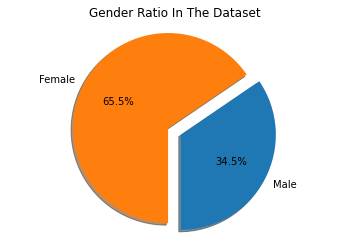

In [622]:
# plot parameters
labels = ['Male', 'Female']
slices = [36214, 68699]
explode = [0, 0.15]
# plotting in a pie chart
plt.pie(slices, labels =labels, explode = explode, shadow = True, startangle = 270, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Gender Ratio In The Dataset");

> The data contains over 65% of women, this might be because women take their health seriously.

- Let's see what percentage missed their appointments across all genders.

In [623]:
# count the number of yes and nos in the no_show column and express as percentage
pct_miss = df['no_show'].value_counts(normalize = True) * 100
pct_miss

No     79.751794
Yes    20.248206
Name: no_show, dtype: float64

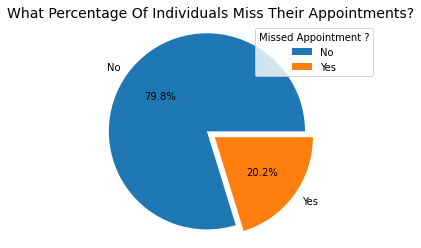

In [624]:
# plot the above count
pct_miss.plot(kind = 'pie',autopct='%1.1f%%',explode = [0.1,0], startangle = 0)
plt.axis('equal')
plt.ylabel("")
plt.legend(title = 'Missed Appointment ?')
plt.title('What Percentage Of Individuals Miss Their Appointments?', fontdict= {'fontsize':14});

> 20% of individuals miss their appointments, is missing appointments gender specific?

In [625]:
# percentage of each gender that showed up for their appointments
g_show = df.groupby('gender')['no_show'].value_counts(normalize = True) 
g_show

gender  no_show
F       No         0.796431
        Yes        0.203569
M       No         0.799580
        Yes        0.200420
Name: no_show, dtype: float64

In [626]:
#Resetting the above groupby to a dataframe
g_show = g_show.reset_index(name = 'perc')
g_show

,gender,no_show,perc
0,F,No,0.796431
1,F,Yes,0.203569
2,M,No,0.799580
3,M,Yes,0.200420


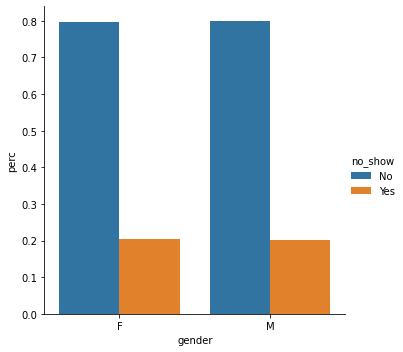

In [659]:
#Visualize the gender no show results
sns.catplot(data = g_show, x = 'gender', y = 'perc', hue = 'no_show', kind = 'bar');

> The rate of no show across the two different gender is the same as the general rate, gender might not be a factor that affects no show.

### Does Wait time Contribute To Missed Appointments ?

In [628]:
# Show a summary of the wait time for people that showed up for their appointmens
df.query('no_show == "No"').days_waited.describe()

count    83670.000000
mean         8.849564
std         14.609065
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max        179.000000
Name: days_waited, dtype: float64

In [629]:
# Show a summary of wait time for people that didn't show up
df.query('no_show == "Yes"').days_waited.describe()

count    21243.000000
mean        15.795933
std         16.628653
min          0.000000
25%          4.000000
50%         10.000000
75%         23.000000
max        179.000000
Name: days_waited, dtype: float64

In [630]:
# Check the average wait time for missed and honored appointments
wt_avg = df.groupby('no_show')['days_waited'].mean().reset_index()
wt_avg

,no_show,days_waited
0,No,8.849564
1,Yes,15.795933


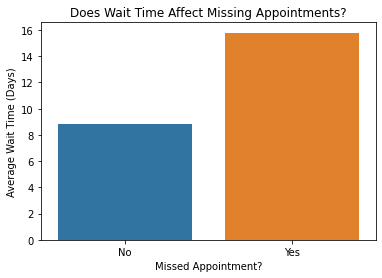

In [631]:
# Show a barplot of the data above
sns.barplot( data = wt_avg, x = 'no_show', y = 'days_waited')
plt.xlabel('Missed Appointment?')
plt.ylabel('Average Wait Time (Days)')
plt.title('Does Wait Time Affect Missing Appointments?');

In [632]:
# Count the percentage of appointments missed for different wait days
dwns = df.groupby('days_waited')['no_show'].value_counts(normalize = True)
dwns.head()

days_waited  no_show
0            No         0.954979
             Yes        0.045021
1            No         0.786651
             Yes        0.213349
2            No         0.761898
Name: no_show, dtype: float64

In [633]:
dwns = dwns.reset_index(name = 'percentage') # reset the above groupby to a dataframe
dwns = dwns.query('no_show == "Yes"') # subsetting the dataframe to only appointments missed
dwns.head()

,days_waited,no_show,percentage
1,0,Yes,0.045021
3,1,Yes,0.213349
5,2,Yes,0.238102
7,3,Yes,0.234410
9,4,Yes,0.232284


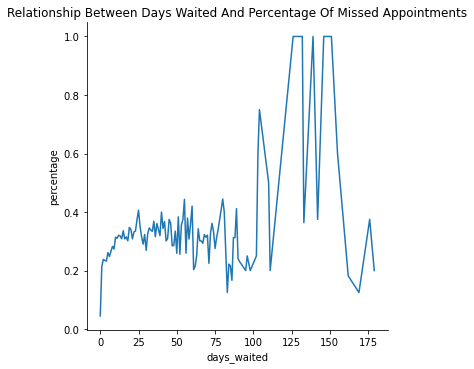

In [634]:
# Visualizing the data to check for a relationship between days waited and percentage of appointments missed
sns.relplot(data = dwns, x = 'days_waited', y= 'percentage', kind = 'line')
plt.title('Relationship Between Days Waited And Percentage Of Missed Appointments');

> It seems shorter wait times are less likely to be missed and longer wait times are more likely missed, but were they reminded of their appointments?

> We'll see that in the next section



### Are SMS reminders effective in reducing no-show ?

In [635]:
# Check the percentage of those that received sms reminders
df.sms_received.value_counts(normalize=True) * 100

No     66.698121
Yes    33.301879
Name: sms_received, dtype: float64

It seems most people did not receive sms reminders, let's check for people that had a wait time greater than 10 days, did they receive?

In [636]:
# Check the percentage of those that received sms reminders with a wait time greater than 10 days
df.query('days_waited > 10').sms_received.value_counts(normalize = True) *100

Yes    62.182394
No     37.817606
Name: sms_received, dtype: float64

> Wow!! Over 60 percent of people with wait times greater than 10 days received a sms reminder, but was the reminder effective?

In [637]:
# Check the if people with wait day longer than 10 days showed up and if they were reminded 
sms_response = df.query('days_waited > 10').groupby('sms_received')['no_show'].value_counts(normalize =True)*100
sms_response

sms_received  no_show
No            No         63.364982
              Yes        36.635018
Yes           No         70.310741
              Yes        29.689259
Name: no_show, dtype: float64

> There is better response from those that received sms reminders to show up for their appointments. Let us visualize this

In [638]:
# Setting our groupby to a dataframe
sms_response = sms_response.reset_index(name = 'percentage')
sms_response

,sms_received,no_show,percentage
0,No,No,63.364982
1,No,Yes,36.635018
2,Yes,No,70.310741
3,Yes,Yes,29.689259


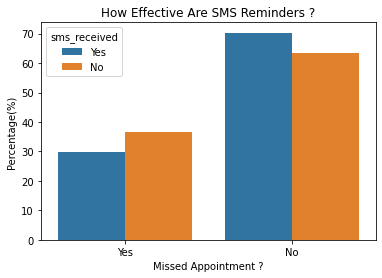

In [639]:
# plotting the values
sns.barplot(data = sms_response, x = 'no_show', y = 'percentage', hue = 'sms_received', 
            hue_order = ['Yes', 'No'], order = ['Yes','No'])
plt.xlabel('Missed Appointment ?')
plt.ylabel('Percentage(%)')
plt.title('How Effective Are SMS Reminders ?');

> Less people miss their appointments when they are reminded of it.

### What Age Group Misses Appointments The Most?

In [640]:
# Group data by age and age groups and see what percentage Missed appointments
aptage =df.groupby(['age','age_group'])['no_show'].value_counts(normalize = True)*100
aptage

age  age_group  no_show
0    children   No          81.826112
                Yes         18.173888
1    children   No          81.557377
                Yes         18.442623
2    children   No          84.375000
                              ...    
97   seniors    No          81.818182
                Yes         18.181818
98   seniors    No          80.000000
                Yes         20.000000
99   seniors    No         100.000000
Name: no_show, Length: 199, dtype: float64

In [641]:
# saving our groupby as a dataframe
aptage = aptage.reset_index(name = 'percentage')
aptage

,age,age_group,no_show,percentage
0,0,children,No,81.826112
1,0,children,Yes,18.173888
2,1,children,No,81.557377
3,1,children,Yes,18.442623
4,2,children,No,84.375000
...,...,...,...,...
194,97,seniors,No,81.818182
195,97,seniors,Yes,18.181818
196,98,seniors,No,80.000000
197,98,seniors,Yes,20.000000


In [642]:
# subsetting it to only those that missed their appointments
aptage_noshow = aptage.query('no_show == "Yes"')
aptage_noshow

,age,age_group,no_show,percentage
1,0,children,Yes,18.173888
3,1,children,Yes,18.442623
5,2,children,Yes,15.625000
7,3,children,Yes,18.030513
9,4,children,Yes,21.697358
...,...,...,...,...
189,94,seniors,Yes,18.181818
191,95,seniors,Yes,25.000000
193,96,seniors,Yes,5.882353
195,97,seniors,Yes,18.181818


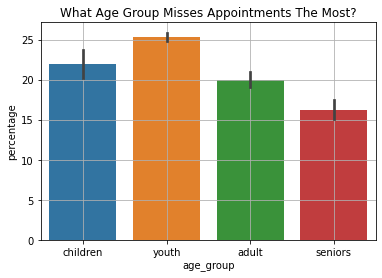

In [643]:
# Plotting the above data
sns.barplot(data = aptage_noshow, x = 'age_group', y = 'percentage')
plt.title("What Age Group Misses Appointments The Most?")
plt.grid();

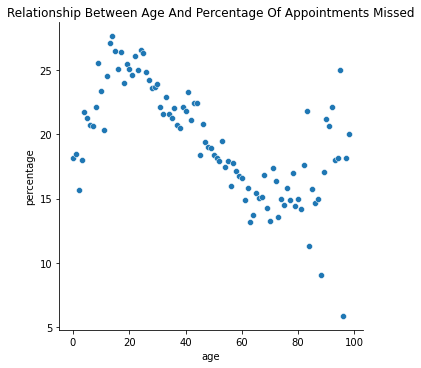

In [644]:
# Let's visualize the relationship between ages and the count of appoitments missed
sns.relplot(data = aptage_noshow, x = 'age', y= 'percentage',kind = 'scatter')
plt.title('Relationship Between Age And Percentage Of Appointments Missed');


> 1. Youths(age 15 -24) miss their appointments more often followed by children(age 0 -14).
> 2. Children might miss their appointments because of the unavailability of their parents to take them there.
> 3. Seniors take their appointments seriously than every other age group, although a few cases do not conform to this generalization

### What Is The Percentage Of No Show Across Days Of The Week?

In [645]:
wkday_ns = df.groupby('appointment_wkday')['no_show'].value_counts(normalize =True)
wkday_ns

appointment_wkday  no_show
Monday             No         0.791061
                   Yes        0.208939
Tuesday            No         0.800131
                   Yes        0.199869
Wednesday          No         0.803015
                   Yes        0.196985
Thursday           No         0.805347
                   Yes        0.194653
Friday             No         0.786996
                   Yes        0.213004
Saturday           No         0.769231
                   Yes        0.230769
Name: no_show, dtype: float64

> The percentage of appointments missed across weekdays seem to be uniform, let's plot a visualization below the compare the rate of missed appointments across different days

In [646]:
wkday_ns = wkday_ns.reset_index(name ='percentage') # resetting index in the grouping above
wkday_ns.head()

,appointment_wkday,no_show,percentage
0,Monday,No,0.791061
1,Monday,Yes,0.208939
2,Tuesday,No,0.800131
3,Tuesday,Yes,0.199869
4,Wednesday,No,0.803015


In [647]:
# subsetting the above to only missed appointments
wkday_ns = wkday_ns.query('no_show == "Yes"')
wkday_ns['percentage'] = round(wkday_ns['percentage'], 2)
wkday_ns.head()

,appointment_wkday,no_show,percentage
1,Monday,Yes,0.21
3,Tuesday,Yes,0.20
5,Wednesday,Yes,0.20
7,Thursday,Yes,0.19
9,Friday,Yes,0.21


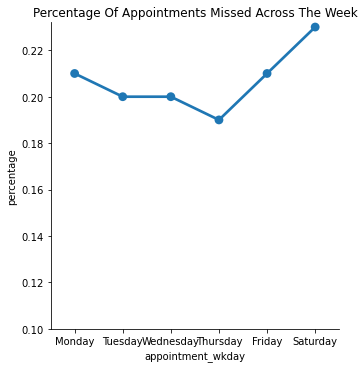

In [658]:
# Visualization
sns.catplot(data = wkday_ns, x='appointment_wkday', y = 'percentage', kind = 'point')
plt.axis(ymin = 0.1)
plt.title('Percentage Of Appointments Missed Across The Week');

> There is no clear indication that day of appointment affects rate of missed appointments even with slight increase on Saturday.

###  Some Other Factors That Might Affect  Missed Appointments?

Health and behavioural factors might be contributing factors as to why a patient might miss their appointment. Let's observe areas like :

- Hypertensive Patients
- Diabetic Patients
- Alcoholic Patients
- Handicapped Patients

#### 1. Hypertensive Patients

In [650]:
# check percentage of no_show values when a patient has hypertension
hyp = df.query('hypertension =="Yes"').no_show.value_counts(normalize = True)*100
hyp

No     82.69921
Yes    17.30079
Name: no_show, dtype: float64

#### 2. Diabetic Patients

In [651]:
# check percentage of no_show values when a patient has diabetes
dbt = df.query('diabetes =="Yes"').no_show.value_counts(normalize = True)*100
dbt

No     81.996598
Yes    18.003402
Name: no_show, dtype: float64

#### 3. Alcoholic Patients

In [652]:
# check percentage of no_show values when a patient is an alcoholic
alc = df.query('alcoholism =="Yes"').no_show.value_counts(normalize = True)*100
alc

No     78.129252
Yes    21.870748
Name: no_show, dtype: float64

#### 4. Handicapped Patients

In [653]:
# check percentage of no_show values when a patient is handicapped
hdp = df.query('handicap =="Yes"').no_show.value_counts(normalize = True)*100
hdp

No     82.687709
Yes    17.312291
Name: no_show, dtype: float64

In [654]:
healthdf = pd.DataFrame({'Condition':['Hypertensive', 'Diabetic', 'Alcoholic', 'Handicapped'], 'Missed_apt(%)':[17.299962,18.003402,21.870748,17.374702]})
healthdf.set_index('Condition', inplace = True)
healthdf

,Missed_apt(%)
Condition,
Hypertensive,17.299962
Diabetic,18.003402
Alcoholic,21.870748
Handicapped,17.374702


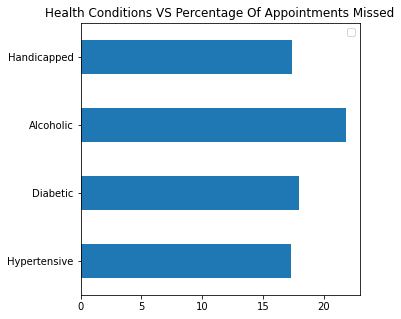

In [655]:
#plot the values in dataframe above;
healthdf.plot(kind = 'barh', figsize=(5,5))
plt.title('Health Conditions VS Percentage Of Appointments Missed')
plt.ylabel('')
plt.legend('');

#### Observations
1. On a general scale there isn't much deviation from the general average percentage of missed appointments of 20%
2. Alcoholics missed more appointments than any other group analysed.

<a id='conclusions'></a>
## Conclusions


The findings from this analysis are tentative and subject to further statistical analysis, as no form of inferential statistics was used. The following information was unravelled from the data:

1. In general, up to 20 % of individuals miss their appointments.

2. Appointments that have longer wait times have higher rates of them being missed.

3. Sending reminder text messages to patients with longer wait time, helps to increase honored appointments.

4. Youths and children tend to miss appointments the most.

5. Day of the week has no traceable effect on rates of missed appointments, even if the rate slightly increases on Saturdays. 

5. Alcoholics have a higher rate of missed appointments when compared to other health conditions.

### Limitations

Some areas in the data that left me confused and might skew my analysis includes:

1. Assumptions were made for the huge number of multiple appointments made by patients over a short period of time.
2. The female gender might be oversampled in this dataset.
3. People with a very long wait time, up to a 100 days, the reason for this was asssumed and no information was given regarding this.
4. There was no pointer to the time of the day of the appointment, it would have been great if we knew the appointment was in the morning, afternoon or evening.